# Loan Prediction Model

## importing the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


## Upload the data set

In [2]:
data2 = pd.read_csv("loan_prediction.csv")

In [3]:
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data2.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
82,LP001267,Female,Yes,2,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N
123,LP001432,Male,Yes,2,Graduate,No,2957,0.0,81.0,360.0,1.0,Semiurban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
87,LP001282,Male,Yes,0,Graduate,No,2500,2118.0,104.0,360.0,1.0,Semiurban,Y
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
259,LP001864,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,NaN,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
199,LP001673,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,N
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data2.shape

(614, 13)

## check the null values

In [7]:
data2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Count Plot of Loan Status

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

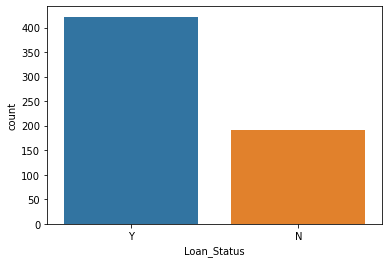

In [9]:
sb.countplot(x="Loan_Status",data= data2)

<AxesSubplot:xlabel='Education', ylabel='count'>

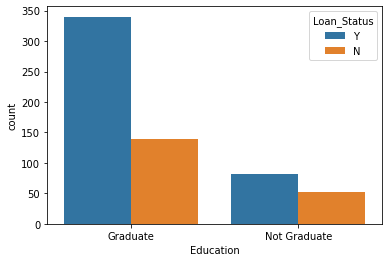

In [10]:
sb.countplot(x="Education",hue = "Loan_Status",data= data2)

<AxesSubplot:xlabel='Married', ylabel='count'>

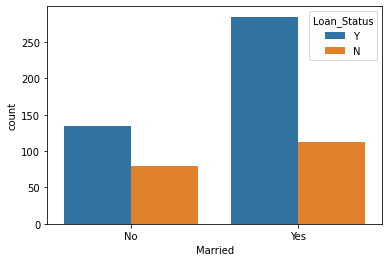

In [11]:
sb.countplot(x="Married",hue = "Loan_Status",data= data2)

## Heatmap for null values

<AxesSubplot:>

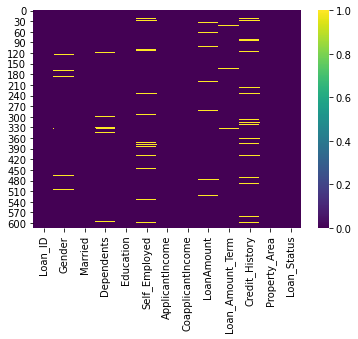

In [12]:
sb.heatmap(data2.isnull(),cmap="viridis")

## Remove the null values

In [13]:
# Fill all NAN values with respective mode values

data2["Gender"].fillna(data2["Gender"].mode()[0],inplace = True)
data2["Self_Employed"].fillna(data2["Self_Employed"].mode()[0],inplace = True)
data2["LoanAmount"].fillna(data2["LoanAmount"].mode()[0],inplace=True)
data2["Loan_Amount_Term"].fillna(data2["Loan_Amount_Term"].mode()[0],inplace = True)
data2["Credit_History"].fillna(data2["Credit_History"].mode()[0],inplace = True)
data2["Dependents"].fillna(data2["Dependents"].mode()[0],inplace=True)
data2["Married"].fillna(data2["Married"].mode()[0],inplace = True)

<AxesSubplot:>

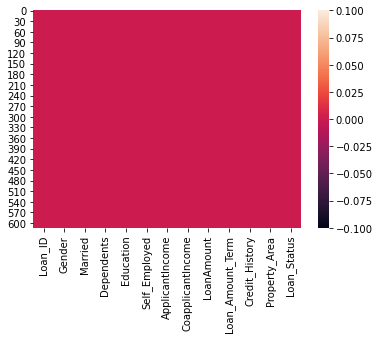

In [14]:
sb.heatmap(data2.isnull())

In [15]:
data2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
data2.sample(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
529,LP002716,Male,No,0,Not Graduate,No,6783,0.0,130.0,360.0,1.0,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
455,LP002455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
64,LP001222,Female,No,0,Graduate,No,4166,0.0,116.0,360.0,0.0,Semiurban,N
187,LP001643,Male,Yes,0,Graduate,No,2383,2138.0,58.0,360.0,1.0,Rural,Y
377,LP002223,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,1.0,Semiurban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
212,LP001713,Male,Yes,1,Graduate,Yes,7787,0.0,240.0,360.0,1.0,Urban,Y


### In the above sample set we are getting '3+' type of data in the dependents columns

In [17]:
data2["Dependents"].dtypes


dtype('O')

### Dependents feature is an object type 

In [18]:
data2["Dependents"] = data2["Dependents"].replace("3+",int(3))
data2["Dependents"] = data2["Dependents"].replace("2",int(2))
data2["Dependents"]=data2["Dependents"].replace("1",int(1))
data2["Dependents"]=data2["Dependents"].replace("0",int(0))

# converted into integer datatype

In [19]:
data2["Dependents"].unique()

array([0, 1, 2, 3], dtype=int64)

## Label Encoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
data2["Gender"] = le.fit_transform(data2["Gender"])
data2["Married"] = le.fit_transform(data2["Married"])
data2["Education"] = le.fit_transform(data2["Education"])
data2["Self_Employed"] = le.fit_transform(data2["Self_Employed"])
data2["Property_Area"] = le.fit_transform(data2["Property_Area"])
data2["Loan_Status"] = le.fit_transform(data2["Loan_Status"])

# or by one hot encoding but after then we have to delete one column but it can we remove by the labvel encoder. 
# data2 = pd.get_dummies(data2)


In [22]:
data2.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
434,LP002390,1,0,0,0,0,3750,0.0,100.0,360.0,1.0,2,1
574,LP002863,1,1,3,0,0,6406,0.0,150.0,360.0,1.0,1,0
550,LP002778,1,1,2,0,1,6633,0.0,120.0,360.0,0.0,0,0
155,LP001536,1,1,3,0,0,39999,0.0,600.0,180.0,0.0,1,1
46,LP001138,1,1,1,0,0,5649,0.0,44.0,360.0,1.0,2,1
585,LP002912,1,1,1,0,0,4283,3000.0,172.0,84.0,1.0,0,0
156,LP001541,1,1,1,0,0,6000,0.0,160.0,360.0,1.0,0,1
216,LP001722,1,1,0,0,0,150,1800.0,135.0,360.0,1.0,0,0
268,LP001883,0,0,0,0,0,3418,0.0,135.0,360.0,1.0,0,0
533,LP002729,1,0,1,0,0,11250,0.0,196.0,360.0,1.0,1,0


### As loan ID is not depending feature so we going to drop that features

In [23]:
data2.drop(["Loan_ID"],axis = 1,inplace = True)

In [24]:
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Variable Assigning

In [25]:
X = data2.drop(["Loan_Status"],axis =1)
Y = data2["Loan_Status"]

## Splitting the dataset in test and train

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state= 2)

## Logistic Regression

In [27]:
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\amita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predictions = model.predict(X_test)

In [29]:
predictions

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.7837837837837838